In [44]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split


In [45]:
#load data 
def load_CKD_data():
   df =pd.read_csv(r'C:\Users\Hiba\Desktop\EC449\Datasets\ckd.csv')
   return df



## Exploaring Dataset 

In [46]:
ckd_data = load_CKD_data()
ckd_data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [47]:
#summurey of each numrical values 
ckd_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [48]:
#drop id coulmn there is no need to it 
ckd_data.drop('id', axis = 1, inplace = True)

In [49]:
#Rename Features 

ckd_data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'classification']


<function matplotlib.pyplot.show(*args, **kw)>

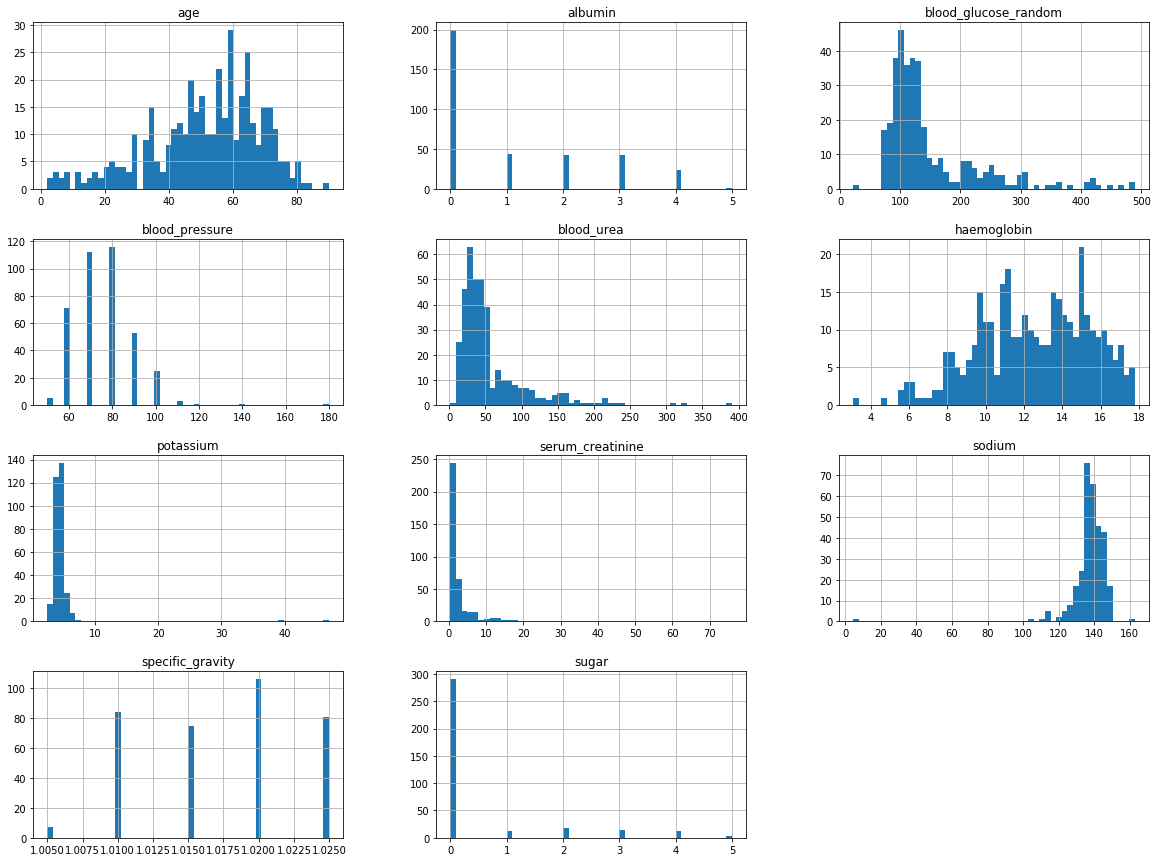

In [50]:
#plot histogram for every attribute 

%matplotlib inline

import matplotlib.pyplot as plt 

ckd_data.hist(bins = 50, figsize=(20,15))
plt.show



In [51]:
#information about datasets as non-null values and datatypes
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age                        391 non-null float64
blood_pressure             388 non-null float64
specific_gravity           353 non-null float64
albumin                    354 non-null float64
sugar                      351 non-null float64
red_blood_cells            248 non-null object
pus_cell                   335 non-null object
pus_cell_clumps            396 non-null object
bacteria                   396 non-null object
blood_glucose_random       356 non-null float64
blood_urea                 381 non-null float64
serum_creatinine           383 non-null float64
sodium                     313 non-null float64
potassium                  312 non-null float64
haemoglobin                348 non-null float64
packed_cell_volume         330 non-null object
white_blood_cell_count     295 non-null object
red_blood_cell_count       270 non-null object
hypertension               398 non-nul

## Cleaning Data

In [52]:
#turn some object values into numrical 
objtonum = ["packed_cell_volume","white_blood_cell_count", "red_blood_cell_count"]
for i in objtonum:
    ckd_data[i] = pd.to_numeric(ckd_data[i], errors='coerce')


#cdk_data.info()

In [53]:
#put numrical and textual data in diffreant data frames 

text_ckd = ckd_data.select_dtypes(include=object)
num_ckd = ckd_data.select_dtypes(include= float)       


In [54]:
#cheak for unique values in cat data 
for col in text_ckd:
   print(f'unique valuse in {col} are {text_ckd[col].unique()}')


unique valuse in red_blood_cells are [nan 'normal' 'abnormal']
unique valuse in pus_cell are ['normal' 'abnormal' nan]
unique valuse in pus_cell_clumps are ['notpresent' 'present' nan]
unique valuse in bacteria are ['notpresent' 'present' nan]
unique valuse in hypertension are ['yes' 'no' nan]
unique valuse in diabetes_mellitus are ['yes' 'no' ' yes' '\tno' '\tyes' nan]
unique valuse in coronary_artery_disease are ['no' 'yes' '\tno' nan]
unique valuse in appetite are ['good' 'poor' nan]
unique valuse in peda_edema are ['no' 'yes' nan]
unique valuse in aanemia are ['no' 'yes' nan]
unique valuse in classification are ['ckd' 'ckd\t' 'notckd']


In [55]:
ckd_data["diabetes_mellitus"].replace(to_replace={" yes": "yes", '\tno': "no", "\tyes": "yes"}, inplace = True)
ckd_data["coronary_artery_disease"].replace(to_replace={'\tno': "no"}, inplace = True)
ckd_data["classification"].replace(to_replace={'notckd': "not ckd","ckd\t": "ckd"}, inplace = True)



In [56]:
#cheak for unique values in num data 
for col in num_ckd:
   print(f'unique valuse in {col} are {num_ckd[col].unique()}')

unique valuse in age are [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique valuse in blood_pressure are [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique valuse in specific_gravity are [1.02  1.01  1.005 1.015   nan 1.025]
unique valuse in albumin are [ 1.  4.  2.  3.  0. nan  5.]
unique valuse in sugar are [ 0.  3.  4.  1. nan  2.  5.]
unique valuse in blood_glucose_random are [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210.

In [57]:
#number of null values in the whole dataset
ckd_data.isnull().sum().sum()

1012

## Pre-processing Data

In [58]:
#delling with missing values 
# 1. Replacing Null values with zeros
for col in num_ckd:
    ckd_data[col] = ckd_data[col].fillna(0)



In [59]:
#delling with missing values 
# 2. Replacing Null values with mean 
for col in num_ckd:
    ckd_data[col] = ckd_data[col].fillna(value = ckd_data[col].mean())


In [60]:
#Feature encoding 
# 1. one label encoding????
for col in text_ckd:
    ckd_data[col] = ckd_data[col].astype("category").cat.codes



## Machine Learining

In [61]:
#specify input and target and drop id 
inputs = [col for col in ckd_data.columns if col not in ['classification'] ]

target = ["classification"]


In [62]:
# assign X, y to dataframe 
X = ckd_data[inputs]
y = ckd_data[target]

X.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,-1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,-1,1,0,0,0.0,...,11.3,38.0,6000.0,0.0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,0.0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 420, stratify = y)

In [64]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.925 

Confusion Matrix :- 
[[46  4]
 [ 2 28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.88      0.93      0.90        30

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.8
Test Accuracy of KNN is 0.7 

Confusion Matrix :- 
[[29 21]
 [ 3 27]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.91      0.58      0.71        50
           1       0.56      0.90      0.69        30

    accuracy                           0.70        80
   macro avg       0.73      0.74      0.70        80
weighted avg       0.78      0.70      0.70        80



C:\Users\Hiba\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
